데이터 불러오기

In [1]:
import pandas as pd 

train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
sample_submission = pd.read_csv('dataset/sample_submission.csv')

In [2]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


- id: 각 컬럼의 고유한 id
- Store: 쇼핑몰 지점 정보
- Date: 주 단위 날짜
- Temperature: 쇼핑몰 주변 기온
- Fuel_Price: 쇼핑몰 주변 연료 가격
- Promotion: 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment: 실업률 정보
- IsHoliday: 공휴일 정보
- Weekly_Sales: 주간 매출액

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [4]:
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe() # descirbe는 기초 통계량을 보여준다.

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


데이터 시각화

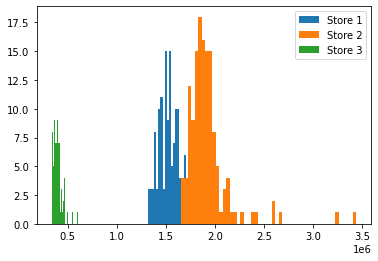

In [5]:
import matplotlib.pyplot as plt

# 지점별 weekly_sales 확인
plt.hist(train[train.Store==1].Weekly_Sales, bins=50)
plt.hist(train[train.Store==2].Weekly_Sales, bins=50)
plt.hist(train[train.Store==3].Weekly_Sales, bins=50)
plt.legend(['Store 1', 'Store 2', 'Store 3'])

plt.show()

데이터 전처리

In [6]:
train = train.fillna(0)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    6255 non-null   float64
 6   Promotion2    6255 non-null   float64
 7   Promotion3    6255 non-null   float64
 8   Promotion4    6255 non-null   float64
 9   Promotion5    6255 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [7]:
# date의 문자 형태를 숫자 형태로 변환
def date_encoder(date):
    day, month, year = map(int, date.split('/'))

    return day, month, year

train['Day'] = train['Date'].apply(lambda x: date_encoder(x)[0])
train['Month'] = train['Date'].apply(lambda x: date_encoder(x)[1])
train['Year'] = train['Date'].apply(lambda x: date_encoder(x)[2])

train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Day,Month,Year
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,5,2,2010
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,12,2,2010
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,19,2,2010
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,26,2,2010
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,31,8,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,7,9,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,14,9,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,21,9,2012


In [8]:
# 현재 데이터는 주간 데이터이기 때문에 일에 대한 정보를 오염시킬 수 있다.(그렇기에 제거)
train = train.drop(columns=['Date', 'Day'])
train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,2010
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,2010
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,2010
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,2010
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,2012
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,2012
6252,6253,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,2012
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,2012


In [9]:
# promotion column scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

scaled = scaler.transform(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

train[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled

train

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,2,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,3,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,4,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,5,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,2012,3.580831,-0.168998,-0.065037,1.574261,0.598779
6251,6252,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,2012,1.453422,-0.167623,-0.072573,0.222921,0.128229
6252,6253,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,2012,1.518086,-0.170211,-0.081610,0.635401,0.909037
6253,6254,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,2012,1.019698,-0.151556,-0.070589,0.360229,1.735591


In [10]:
train = train.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

In [11]:
train

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,42.31,2.572,8.106,False,1643690.90,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,2,1,38.51,2.548,8.106,True,1641957.44,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,3,1,39.93,2.514,8.106,False,1611968.17,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,4,1,46.63,2.561,8.106,False,1409727.59,2,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,5,1,46.50,2.625,8.106,False,1554806.68,3,2010,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,75.09,3.867,8.684,False,734297.87,8,2012,3.580831,-0.168998,-0.065037,1.574261,0.598779
6251,6252,45,75.70,3.911,8.684,True,766512.66,9,2012,1.453422,-0.167623,-0.072573,0.222921,0.128229
6252,6253,45,67.87,3.948,8.684,False,702238.27,9,2012,1.518086,-0.170211,-0.081610,0.635401,0.909037
6253,6254,45,65.32,4.038,8.684,False,723086.20,9,2012,1.019698,-0.151556,-0.070589,0.360229,1.735591


In [12]:
# 위의 사항들에 대햐여 test에도 적용
test = test.fillna(0)

test['Month'] = test['Date'].apply(lambda x: date_encoder(x)[1])
test['Year'] = test['Date'].apply(lambda x: date_encoder(x)[2])
test = test.drop(columns=['Date'])

scaled = scaler.transform(test[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

test[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled

test = test.drop(columns=['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

test

,id,Store,Temperature,Fuel_Price,Unemployment,IsHoliday,Month,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,68.55,3.617,6.573,False,10,2012,0.956583,-0.170211,-0.079007,0.686920,0.509844
1,2,1,62.99,3.601,6.573,False,10,2012,-0.053718,-0.170211,-0.080897,-0.106760,1.068815
2,3,1,67.97,3.594,6.573,False,10,2012,-0.245241,-0.170211,-0.081492,-0.244199,0.190716
3,4,1,69.16,3.506,6.573,False,10,2012,0.030535,-0.163792,-0.081292,0.012961,-0.054187
4,5,2,70.27,3.617,6.170,False,10,2012,0.612584,-0.170211,-0.080536,0.531594,0.565067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,46.97,3.755,5.217,False,10,2012,-0.398965,-0.169683,-0.082230,-0.265323,-0.260073
176,177,45,64.89,3.985,8.667,False,10,2012,0.445482,-0.170211,-0.078895,0.327864,0.197316
177,178,45,54.47,4.000,8.667,False,10,2012,-0.075621,-0.170211,-0.080938,-0.107560,0.598392
178,179,45,56.47,3.969,8.667,False,10,2012,-0.067571,-0.170211,-0.081819,-0.150097,0.002305


Modeling

In [13]:
# 랜덤 포레스트는 대표적인 앙상블(ensemble) 모델의 일종입니다. "여러 개의 트리 모델" 에 "서로 다른 데이터"를 투입하여 나온 결과를 종합하여 가장 많은 투표(Voting)를 얻은 결과를 최종 결과로 선택하는 방식으로 작동합니다.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [14]:
# 필요 없는 컬럼 제거
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# y와 x 분리
x_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

In [15]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [16]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1618312.0434 1508632.295  1484308.1053 1451896.8412 1754909.7013
 1688917.5982 1688181.2606 1697388.6557  540132.4958  535173.08  ]


In [17]:
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,id,Weekly_Sales
0,1,1.618312e+06
1,2,1.508632e+06
2,3,1.484308e+06
3,4,1.451897e+06
4,5,1.754910e+06


In [18]:
sample_submission.to_csv('advanced_submission.csv', index=False)